* I am loading file LoanStats3d.csv instead of LoanStats3b.csv --> this is the file I have in u2_l5
* The effect is to reproduce the same series / column for all collumns in year_month_summary -- surely a bug
* I understand what a time series is. I do not fully understand ACF and PCF, or how they correspond to the graphs in the lesson, which I presume I am supposed to recreate.
* I have read the Robert Nau notes and related Wikipedia entries. 

# Unit 2 Lesson 6 Assignment 2: ARIMA Analysis with Loan Data

#### Estimated time 1 hour

A more involved approach to time-series analysis is the ARIMA method. The acronym stands for "Auto-Regressive Integrated Moving Average", the main components of the model. The general idea behind this model is that a series can be expressed as a function of its most recent observations ("auto-regressive" indicates a regression of an observation on itself, or more specifically, running a regression on an observation using previous observations as explanatory variables) as well as a trend component of the forecast errors (moving average).

ARIMA models assume that the time-series is stationary, which in this context, means that the mean, variance and autocorrelation does not change over time. In practice this means that a differenced series (the result of subtracting a set of observations in a series with a previous observation of a fixed time lag) is often used to model an ARIMA process. Adding back the difference to get a model for the original series is considered "integrating."

* Using [Lending Club Statistics](https://github.com/Thinkful-Ed/curric-data-001-data-sets/tree/master/loans) from previous lessons, create a monthly time series of the loan counts by the issue date (issue_d). If you want, you can use the code below to reshape the data.


In [57]:
import pandas as pd
import numpy as np 

df = pd.read_csv('../u2_l5/LoanStats3d.csv', header=1, low_memory=False)

# converts string to datetime object in pandas:
df['issue_d_format'] = pd.to_datetime(df['issue_d']) 
dfts = df.set_index('issue_d_format') 
year_month_summary = dfts.groupby(lambda x : x.year * 100 + x.month).count()
loan_count_summary = year_month_summary['issue_d']

In [58]:
year_month_summary.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_credit_rv,inq_fi,total_fi_tl,inq_last_12m
201501,35107,35107,35107,35107,35107,35107,35107,35107,35107,35107,...,0,0,0,0,0,0,35107,0,0,0
201502,23770,23770,23770,23770,23770,23770,23770,23770,23770,23770,...,0,0,0,0,0,0,23770,0,0,0
201503,25400,25400,25400,25400,25400,25400,25400,25400,25400,25400,...,0,0,0,0,0,0,25400,0,0,0
201504,35427,35427,35427,35427,35427,35427,35427,35427,35427,35427,...,0,0,0,0,0,0,35427,0,0,0
201505,31913,31913,31913,31913,31913,31913,31913,31913,31913,31913,...,0,0,0,0,0,0,31913,0,0,0


Make sure you read in the file from the correct location.

## Note

In addition to the data types we've discussed (`int`, `float`, and `str`), Python also has a `datetime` data type that encodes the date and time in a tuple that includes the year, month, day, hour, minute, second. For more on the datetime objects in Python, see the [Python documentation](https://docs.python.org/2/library/datetime.html).

# Unit 2 Lesson 6 Project 3: Plot Autocorrelation in Loan Data

#### Estimated Time: 1 hour

The difficulty with ARIMA models is deciding which terms to include in the various components of the model. In modern packages this is often decided by examining the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots. The ACF plots the correlation between observations and the observations from a previous fixed time period or lag. The PACF plots the correlation of an observation and the observation with a given lag, but with the linear relationships of all intervening observations controlled for.

A pattern of consistent significant autocorrelation across all lags, with little indication of decay as the lag increases, usually indicates a non-stationary series that needs to be differenced for the analysis to continue. 

<img src="acf_1.gif">

Similarly, significant spikes in autocorrelation that occur at regular lag intervals suggest that there is a seasonality that needs to be addressed by differencing the series at intervals equal to the lag. 

<img src="acf_2.gif" width="400px" height="400px">

A pattern of quickly decaying autocorrelations but with persistent partial autocorrelations implies that the model is best served by an MA terms to match the lags of significant autocorrelations.

Analogously, persistent autocorrelation with quickly decaying partial autocorrelations point towards adding AR terms to match the significant partial autocorrelations. 

<img src="acf_3.jpg">

ARIMA modeling can be tricky and face common pitfalls like overdifferencing and non-convergence. Unlike some more formal techniques, the final models can be a process driven by nuance and judgment.

* You may also want to read the ARIMA notes of [Robert Nau](http://people.duke.edu/~rnau/411arim.htm).

## Challenge

1. Plot the loan data (loan_count_summary in from the previous assignment). Is the series stationary? If not, what would you do to transform it into a stationary series?

In [53]:
loan_count_summary

201501    35107
201502    23770
201503    25400
201504    35427
201505    31913
201506    28485
201507    45962
201508    35886
201509    28641
Name: issue_d, dtype: int64

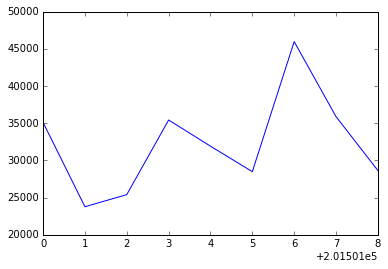

In [54]:
%matplotlib inline

loan_count_summary.plot()

2 Plot out the ACF (`statsmodels.api.graphics.tsa.plot_acf()`) and PACF (`statsmodels.api.graphics.tsa.plot_pacf()`) of the series (or the transformed series). Are there any autocorrelated structures in the series? How would you have a model address these structures?



In [55]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_credit_rv,inq_fi,total_fi_tl,inq_last_12m,issue_d_format
0,60045257,63989975,3000,3000,3000,36 months,19.99%,111.48,E,E4,...,NaN,NaN,NaN,NaN,NaN,8000,NaN,NaN,NaN,2015-09-01
1,60981766,65023535,33250,33250,33200,60 months,19.99%,880.74,E,E4,...,NaN,NaN,NaN,NaN,NaN,15100,NaN,NaN,NaN,2015-09-01
2,60823020,64864837,25000,25000,25000,60 months,7.89%,505.60,A,A5,...,NaN,NaN,NaN,NaN,NaN,105500,NaN,NaN,NaN,2015-09-01


In [56]:
year_month_summary

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_credit_rv,inq_fi,total_fi_tl,inq_last_12m
201501,35107,35107,35107,35107,35107,35107,35107,35107,35107,35107,...,0,0,0,0,0,0,35107,0,0,0
201502,23770,23770,23770,23770,23770,23770,23770,23770,23770,23770,...,0,0,0,0,0,0,23770,0,0,0
201503,25400,25400,25400,25400,25400,25400,25400,25400,25400,25400,...,0,0,0,0,0,0,25400,0,0,0
201504,35427,35427,35427,35427,35427,35427,35427,35427,35427,35427,...,0,0,0,0,0,0,35427,0,0,0
201505,31913,31913,31913,31913,31913,31913,31913,31913,31913,31913,...,0,0,0,0,0,0,31913,0,0,0
201506,28485,28485,28485,28485,28485,28485,28485,28485,28485,28485,...,0,0,0,0,0,0,28485,0,0,0
201507,45962,45962,45962,45962,45962,45962,45962,45962,45962,45962,...,0,0,0,0,0,0,45962,0,0,0
201508,35886,35886,35886,35886,35886,35886,35886,35886,35886,35886,...,0,0,0,0,0,0,35886,0,0,0
201509,28641,28641,28641,28641,28641,28641,28641,28641,28641,28641,...,0,0,0,0,0,0,28641,0,0,0


In [46]:
loan_count_summary

201501    35107
201502    23770
201503    25400
201504    35427
201505    31913
201506    28485
201507    45962
201508    35886
201509    28641
Name: issue_d, dtype: int64

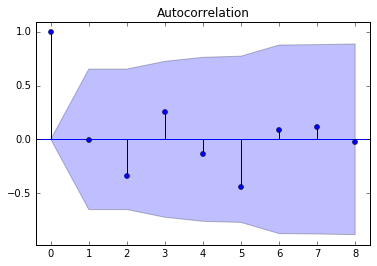

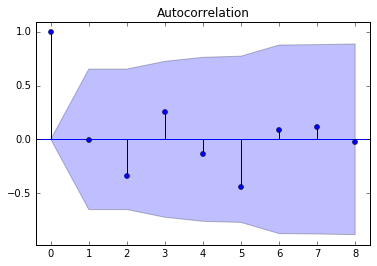

In [50]:
from statsmodels.api import graphics
graphics.tsa.plot_acf(loan_count_summary)
# year_month_summary # 9 rows × 74 columns
# loan_count_summary # 201501 to 201509
# graphics.tsa.plot_pacf(loan_count_summary)


## Submission

Write a script called "time_series.py" to load, clean, and plot the data. Have the script print out whether there are autocorrelated structures in the data. Push the code to Github and include a link below. 